# OLD PHOTOS CLASSIFIER

## Importing Libraries

In [1]:
import pandas as pd
import cv2
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Creating the train and test dataset

### Function for image data preproccessing

In [2]:
def importing_image_data(path, label):
    x = []
    y = []
    for img_name in os.listdir(path):
        if 'spate' in img_name:
            continue
        img = cv2.imread(path + '\\' + img_name)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        img = img / 255
        x.append(img)
        y.append(label)
    
    return np.array(x), np.array(y)

### Preproccessing the black and white and color images seperately

In [3]:
x_black_and_white, y_black_and_white = importing_image_data("D:\\Imagini\\Alb_Negru", 0)
x_color, y_color = importing_image_data("D:\\Imagini\\Color", 1)

x_black_and_white.shape, y_black_and_white.shape, x_color.shape, y_color.shape

((261, 224, 224, 3), (261,), (120, 224, 224, 3), (120,))

### Equaling the number of black and white images to the number of color images

In [4]:
x_black_and_white, y_black_and_white = x_black_and_white[:120], y_black_and_white[:120]

x_black_and_white.shape, y_black_and_white.shape, x_color.shape, y_color.shape

((120, 224, 224, 3), (120,), (120, 224, 224, 3), (120,))

### Creating a test and train set for black and white and color images seperately

In [5]:
x_black_and_white_train, x_black_and_white_test, y_black_and_white_train, y_black_and_white_test = train_test_split(x_black_and_white, y_black_and_white, test_size = 0.2, random_state = 42)
x_color_train, x_color_test, y_color_train, y_color_test = train_test_split(x_color, y_color, test_size=0.2, random_state=42)

print(x_black_and_white_train.shape, x_black_and_white_test.shape, y_black_and_white_train.shape, y_black_and_white_test.shape)
print(x_color_train.shape, x_color_test.shape, y_color_train.shape, y_color_test.shape)

(96, 224, 224, 3) (24, 224, 224, 3) (96,) (24,)
(96, 224, 224, 3) (24, 224, 224, 3) (96,) (24,)


### Combining the test and train sets

In [6]:
x_train = np.vstack((x_black_and_white_train, x_color_train))
x_test = np.vstack((x_black_and_white_test, x_color_test))
y_train = np.hstack((y_black_and_white_train, y_color_train))
y_test = np.hstack((y_black_and_white_test, y_color_test))

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((192, 224, 224, 3), (48, 224, 224, 3), (192,), (48,))

## Model Configuration

### Building the model

In [7]:
model = Sequential()


model.add(Conv2D(64, (3, 3), activation='relu', input_shape = (224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics='accuracy')

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 flatten (Flatten)           (None, 760384)            0         
                                                                 
 dense (Dense)               (None, 256)               194658560 
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                     

### Initializing earlystopping callback

In [8]:
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights = True)

### Training the model

In [9]:
model.fit(x_train, y_train, epochs = 10, validation_data=(x_test, y_test), callbacks=earlystopping)

Epoch 1/10


6/6 [==============================] - 241s 39s/step - loss: 5.2190 - accuracy: 0.4948 - val_loss: 0.7462 - val_accuracy: 0.5000
Epoch 2/10
6/6 [==============================] - 279s 41s/step - loss: 0.6959 - accuracy: 0.4792 - val_loss: 0.5847 - val_accuracy: 0.6250
Epoch 3/10
6/6 [==============================] - 305s 44s/step - loss: 0.5229 - accuracy: 0.7500 - val_loss: 0.4397 - val_accuracy: 0.8542
Epoch 4/10
6/6 [==============================] - 227s 36s/step - loss: 0.8153 - accuracy: 0.6510 - val_loss: 0.4358 - val_accuracy: 0.8333
Epoch 5/10
6/6 [==============================] - 305s 44s/step - loss: 0.6216 - accuracy: 0.8021 - val_loss: 0.4073 - val_accuracy: 0.8125
Epoch 6/10
6/6 [==============================] - 247s 34s/step - loss: 0.3005 - accuracy: 0.8698 - val_loss: 0.2405 - val_accuracy: 0.9167
Epoch 7/10
6/6 [==============================] - 340s 50s/step - loss: 0.1010 - accuracy: 0.9688 - val_loss: 0.2051 - val_accuracy: 0.9167
Epoch 8/10
6/6 [==

### Evaluating the model

2/2 [==============================] - 14s 6s/step


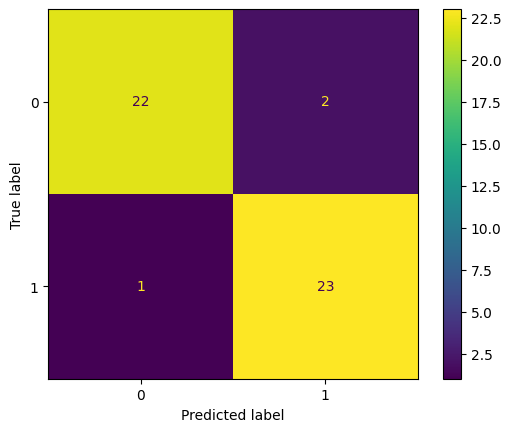

In [10]:
predicted = model.predict(x_test)
predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

#### ! NOT FINAL MODEL !